In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lsp/.virtualenvs/kaggle/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Plot parameters
sns.set()
# Seven hls color palette
current_palette_7 = sns.color_palette("hls", 7)
sns.set_palette(current_palette_7)

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# rcParams.keys()

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

# Singular Value Decomposition

The eigendecomposition can be done only for square matrices. The way to decompose other type of matrices that can't be decomposed with eigendecomposition is to use singular value decomposition. Instead of having the following eigendecomposition equation:

$$
\boldsymbol{A}=\boldsymbol{V}\cdot diag(\boldsymbol{\lambda}) \cdot \boldsymbol{V}^{-1}
$$

We decompose it into 3 matrices:

$$
\boldsymbol{A}=\boldsymbol{UDV}^{\text{T}}
$$

With the following matrix properties:

- $\boldsymbol{U}$ and $\boldsymbol{V}$ being orthogonal matrices ($\boldsymbol{U}^\text{T}=\boldsymbol{U}^{-1}$ and $\boldsymbol{V}^\text{T}=\boldsymbol{V}^{-1}$; see 2.6 for more details about orthogonal matrices)

- $\boldsymbol{D}$ being a diagonal matrix (all 0 except the diagonal). However $\boldsymbol{D}$ is not necessarily square.

<img src="images/singularValues.png" width=300 heigth=300>

The columns of $\boldsymbol{U}$ are the left-singular vectors of $\boldsymbol{A}$ while the columns of $\boldsymbol{V}$ are the right-singular vectors of $\boldsymbol{A}$. The values along the diagonal of $\boldsymbol{D}$ are the singular values of $\boldsymbol{A}$.

Here are the dimensions of the factorization:

<img src="images/SVD_dimensions.png" width=300 heigth=300>


- Every matrix can be seen as a linear transformation
- Every linear transformation can be decomposed in 3 steps: a rotation, a scaling and another rotation
- This decomposition is the singular transformation: U is the first rotation, D the scaling and V^T the second rotation
- A rotation is a linear transformation by an orthogonal matrix and a rescaling of each coordinate is a linear transformation by a diagonal matrix

- SVD can be seen as a projection if the rotation are null and the scaling weight one dimension to near 0

- link between least squares and transformation
- link between 1 singular vector and transformation

## How to do the singular values decomposition

The matrices $\boldsymbol{U}$, $\boldsymbol{D}$ and $\boldsymbol{V}$ can be found by transforming $\boldsymbol{A}$ in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtain by multiplying the matrix $\boldsymbol{A}$ by its transpose in one way or the other:

- $\boldsymbol{U}$ corresponds to the eigenvectors of $\boldsymbol{AA}^\text{T}$
- $\boldsymbol{V}$ corresponds to the eigenvectors of $\boldsymbol{A^\text{T}A}$
- $\boldsymbol{D}$ corresponds to the eigenvalues $\boldsymbol{AA}^\text{T}$ or $\boldsymbol{A^\text{T}A}$ which are the same.

Let's take an example of a non square matrix:

$
A=\begin{bmatrix}
    7 & 2\\\\
    3 & 4\\\\
    5 & 3
\end{bmatrix}
$

The singular value decomposition can be done with the `linalg.svd` function from Numpy. Note that `np.linalg.eig(A)` works only on square matrices and will give an error for `A`:

In [4]:
A = np.array([[7, 2], [3, 4], [5, 3]])
print 'A:\n', A
print 'np.linalg.eig(A):', np.linalg.eig(A)

A:
[[7 2]
 [3 4]
 [5 3]]
np.linalg.eig(A):

LinAlgError: Last 2 dimensions of the array must be square

## The left-singular values

The left-singular values of $\boldsymbol{A}$ correspond to the eigenvectors of $\boldsymbol{AA}^\text{T}$.

### Example 1.

Note that the sign difference comes from the fact that eigenvectors are not unique. The `linalg` functions from Numpy return the normalized eigenvectors. Scaling by `-1` doesn't change their direction or the fact that they are unit vectors.

In [ ]:
U, S, V = np.linalg.svd(A)
D = np.diag(S)
print '\nLeft singular vectors of A:\n', U

print '\nEigenvectors of AA_transpose:\n', np.linalg.eig(A.dot(A.T))[1]

## The right-singular values

The right-singular values of $\boldsymbol{A}$ correspond to the eigenvectors of $\boldsymbol{A}^\text{T}\boldsymbol{A}$.

### Example 2.

In [5]:
U, S, V = np.linalg.svd(A)
print '\nRight singular vectors of A:\n', V

print '\nEigenvectors of A_transposeA:\n', np.linalg.eig(A.T.dot(A))[1]

 
Right singular vectors of A:
[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]

Eigenvectors of A_transposeA:
[[ 0.88033817 -0.47434662]
 [ 0.47434662  0.88033817]]


## The nonzero singular values

The nonzero singular values of $\boldsymbol{A}$ are the square roots of the eigenvalues of $\boldsymbol{A}^\text{T}\boldsymbol{A}$ and $\boldsymbol{AA}^\text{T}$.

### Example 3.

In [6]:
U, S, V = np.linalg.svd(A)
print '\nSingular values of A:\n', S

print '\nEigenvalues of A_transposeA:\n', np.linalg.eig(A.T.dot(A))[0]
print '\nEigenvalues of AA_transpose:\n', np.linalg.eig(A.dot(A.T))[0]
print '\nSquare root of the eigenvalues:\n', np.sqrt(np.linalg.eig(A.T.dot(A))[0])


Singular values of A:
[ 10.25142677   2.62835484]

Eigenvalues of A_transposeA:
[ 105.09175083    6.90824917]

Eigenvalues of AA_transpose:
[ 105.09175083    6.90824917   -0.        ]

Square root of the eigenvalues:
[ 10.25142677   2.62835484]


In [7]:
Proofs : https://www2.math.ethz.ch/education/bachelor/lectures/hs2014/other/linalg_INFK/svdneu.pdf

SyntaxError: invalid syntax (<ipython-input-7-6d9e4e11ce18>, line 1)

# References

[1] [C.O.S. Sorzano from Universidad San Pablo](http://biocomp.cnb.csic.es/~coss/Docencia/algebra/tema8.pdf)

/Users/lsp/.virtualenvs/kaggle/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


(-4, 4)

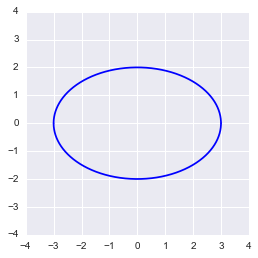

In [30]:
x = np.linspace(-5, 5, 100000)
y = 2*np.sqrt(1-((x/3)**2))
plt.plot(x, y, 'b')
plt.plot(x, -y, 'b')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

In [12]:
A = np.array([[3, 0], [0, 2]])
np.linalg.eig(A.dot(A.T))

(array([ 9.,  4.]), array([[ 1.,  0.],
        [ 0.,  1.]]))

In [13]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print A
print A.T

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]
